# Jones_matrix class

Jones_matrix is a class that manages Jones matrices. It allows the user to create and manipulate them.

## Creating an instance

An instance must be created before starting to operate with the Jones matrix. The initialization accepts one argument: the name of the vector. This name will be used for printing:

In [2]:
from py_pol.jones_matrix import Jones_matrix, create_Jones_matrices
from py_pol.mueller import Mueller
from py_pol.utils import degrees
import numpy as np

In [10]:
J = Jones_matrix("empty_polarizer")
print(J)

empty_polarizer is empty



Several Jones_matrix objects can be created at the same time using the function *create_Jones_matrices*.

In [18]:
J1, J2 = create_Jones_matrices(name=('Element 1', 'Element 2'))
print(J1, J2)

list_of_J = create_Jones_matrices(N=3)
print(list_of_J)

Element 1 is empty
 Element 2 is empty

[J is empty
, J is empty
, J is empty
]


## Jones_matrix class fields

Jones_matrix class objects have some fields where some methods and information is stored:

* **M**: 2x2xN array containing all the Jones matrices.
* **name**: Name of the object for print purposes.
* **shape**: Shape desired for the outputs.
* **size**: Number of stored Jones matrices.
* **ndim**: Number of dimensions for representation purposes.
* **no_rotation**: If True, rotation method do not act upon the object. Useful for objects that shouldn't be rotated as mirrors.
* **_type**: Type of the object ('Jones_matrix'). This is used for determining the object class as using isinstance may throw unexpected results in .ipynb files.


* **parameters**: Object of class *Parameters_Jones_matrix*.
* **checks**: Object of class *Checks_Jones_matrix*.
* **analysis**: Object of class *Analysis_Jones_matrix*.

In [19]:
J = Jones_matrix("Linear diattenuator")
angles = np.linspace(0, 90*degrees, 5)
J.diattenuator_linear(p1=1, p2=0.1, azimuth=angles)

print('Array: ', J.M)
print('Name: ', J.name)
print('Shape: ', J.shape)
print('Size: ', J.size)
print('Size: ', J.ndim)
print('Type: ', J._type, '\n')

print('Parameters (global phase): \n', J.parameters.global_phase(), '\n')
print('Checks (element is homogeneous): \n', J.checks.is_homogeneous(), '\n')
print('Analysis (as diattenuator): \n', J.analysis.diattenuator(), '\n')

Array:  [[[1.00000000e+00+0.j 8.68198052e-01+0.j 5.50000000e-01+0.j
   2.31801948e-01+0.j 1.00000000e-01+0.j]
  [0.00000000e+00+0.j 3.18198052e-01+0.j 4.50000000e-01+0.j
   3.18198052e-01+0.j 5.51091060e-17+0.j]]

 [[0.00000000e+00+0.j 3.18198052e-01+0.j 4.50000000e-01+0.j
   3.18198052e-01+0.j 5.51091060e-17+0.j]
  [1.00000000e-01+0.j 2.31801948e-01+0.j 5.50000000e-01+0.j
   8.68198052e-01+0.j 1.00000000e+00+0.j]]]
Name:  Linear diattenuator
Shape:  [5]
Size:  5
Size:  1
Type:  Jones_matrix 

Parameters (global phase): 
 [0. 0. 0. 0. 0.] 

Checks (element is homogeneous): 
 [ True  True  True  True  True] 

Analysis (as diattenuator): 
 ([array([1., 1., 1., 1., 1.]), array([0.01, 0.01, 0.01, 0.01, 0.01]), array([1., 1., 1., 1., 1.]), array([0.1, 0.1, 0.1, 0.1, 0.1])], [array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633]), array([0., 0., 0., 0., 0.]), array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633]), array([0., 0., 0., 0., 0.])]) 



That is, the output beam is linearly polarized in the direction of the linear polarized axis, and some light is absorbed by the polarized.

## Generating of optical elements

As shown in the previous example, the Jones matrix is initialized with all elements equal to zero. There are many methods that can be used to generate a more desirable vector:

* **from_components**: Creates a Jones_matrix object directly from the 4 elements (m00, m01, m10, m11).
* **from_matrix**: Creates a Jones_matrix object directly from a 2x2 numpy arrays.
* **from_list**: Creates a Jones_matrix object directly from a list of 2x2 numpy arrays.
* **from_Mueller**: Takes a non-depolarizing Mueller Matrix and converts into Jones matrix.
* **vacuum**:  Creates the matrix for vacuum.
* **mirror**: Creates the matrix for a mirror. NOTE: Don't rotate this matrix.
* **filter_amplifier**: Creates the matrix for a neutral filter or amplifier element
* **diattenuator_perfect**: Creates a perfect linear diattenuator.
* **diattenuator_linear**: Creates a real polarizer with perpendicular axes.
* **diattenuator_retarder_linear**: Creates a linear diattenuator retarder with the same axes for diattenuation and retardance.
* **diattenuator_charac_angles**: Creates the most general homogeneous diattenuator with orthogonal eigenstates from the characteristic angles of the main eigenstate.
* **diattenuator_azimuth_ellipticity**: Creates the general homogeneous diattenuator with orthogonal eigenstates from the characteristic angles of the main eigenstate.
* **quarter_waveplate**: Creates a quarter-waveplate.
* **half_waveplate**: Creates a half-waveplate.
* **retarder_linear**: Creates a retarder using delay.
* **retarder_material**: Creates a retarder using physical properties of a anisotropic material.
* **retarder_charac_angles**: Creates the most general homogenous retarder with orthogonal eigenstates from the characteristic angles of the main eigenstate.
* **retarder_azimuth_ellipticity**: Creates the general homogeneous retarder with orthogonal eigenstates from the characteristic angles of the main eigenstate.

For a more detailed description of each method, refer to the individual documentation of each one.

Example: Linear polarizer.

In [20]:
J = Jones_matrix("Polarizer")
J.diattenuator_perfect(azimuth=10*degrees)
print(J)

Polarizer @ 10.00 deg = 
[+0.970 +0.171]   
[+0.171 +0.030]   



The previous example only stores one Jones matrix. It is possible to store many Jones matrices in the same object. This is useful specially when the same operation is performed upon all of them, as rotation. In this way, it is not required to use for loops, reducing significantly the computation time.

There are many ways of creating several Jones matrices in the same object. The first way is creating an object with several identical vectors. This is performed using the *length* argument of most of creation methods:

In [15]:
J = Jones_matrix("Polarizer")
J.diattenuator_perfect(azimuth = 30*degrees, length = 3)
print(J)

Polarizer = 
[+0.750 +0.433]   [+0.750 +0.433]   [+0.750 +0.433]   
[+0.433 +0.250]   [+0.433 +0.250]   [+0.433 +0.250]   



A second way of creating several Jones matrices at the same time is using an array as one of the parameters. Take into account that, if you use this option, all parameters must have the same number of elements or just one element. Otherwise, the program will throw an exception.

In [16]:
J = Jones_matrix("Polarizer")
angles = np.linspace(0, 90*degrees, 5)
J.diattenuator_perfect(azimuth = angles)
print(J)

Polarizer = 
[+1.000 +0.000]   [+0.854 +0.354]   [+0.500 +0.500]   [+0.146 +0.354]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.354 +0.146]   [+0.500 +0.500]   [+0.354 +0.854]   [+0.000 +1.000]   



If the parameters have dimension higher than 1, the program will store that information in order to make prints and plots. In that case, the *print* function separates the four components Jones matrices:

$$J=\left[\begin{array}{cc}
J_{00} & J_{01}\\
J_{10} & J_{11}
\end{array}\right]$$

In [17]:
J = Jones_matrix("Polarizer")
angles = np.random.rand(3,3) * 180*degrees
J.diattenuator_perfect(azimuth = angles)
print(J)

Polarizer J00 = 
[[0.9146759 +0.j 0.01129533+0.j 0.76815199+0.j]
 [0.87160191+0.j 0.79111437+0.j 0.80802083+0.j]
 [0.02389002+0.j 0.99708157+0.j 0.8412461 +0.j]]
Polarizer J01 = 
[[ 0.27936337+0.j -0.10567755+0.j  0.42201245+0.j]
 [ 0.33453254+0.j -0.40651251+0.j  0.39385679+0.j]
 [ 0.15270654+0.j  0.05394358+0.j  0.36544643+0.j]]
Polarizer J10 = 
[[ 0.27936337+0.j -0.10567755+0.j  0.42201245+0.j]
 [ 0.33453254+0.j -0.40651251+0.j  0.39385679+0.j]
 [ 0.15270654+0.j  0.05394358+0.j  0.36544643+0.j]]
Polarizer J11 = 
[[0.0853241 +0.j 0.98870467+0.j 0.23184801+0.j]
 [0.12839809+0.j 0.20888563+0.j 0.19197917+0.j]
 [0.97610998+0.j 0.00291843+0.j 0.1587539 +0.j]]



It is possible to transform *Mueller* objects into *Jones_matrix* objects. Any depolarization properties are removed in the process.

In [23]:
M = Mueller().diattenuator_perfect(azimuth=0)
J = Jones_matrix().from_Mueller(M)
print(J)

J = 
[+1.000 +0.000]   
[+0.000 +0.000]   



### Features of creation methods

*py_pol* model sets the origin of phase in $J_{00}$. It means that the parameter *global_phase* of most creation methods and the methods *remove_global_phase* and *set_global_phase* (see below) will take it as the reference.

In [24]:
J = Jones_matrix("Polarizer")
J.diattenuator_perfect(azimuth = 45*degrees, global_phase = 90*degrees)
print(J)

J.remove_global_phase()
print(J)

Polarizer @ 45.00 deg = 
[+0.000 +0.000]   
[+0.000 +0.000]   

Polarizer @ 45.00 deg = 
[+0.500 +0.500]   
[+0.500 +0.500]   



## Basic operations

Some physical phenomena that affects polarization optical elements is described by simple operations performed to their Jones matrices.

### Multiplication of a Jones matrix by a Jones vector

When a light beam $E_1$ goes through a polarization optical element $J_1$, the polarization state of the output beam can be determined as: $E_2 = J_1 * E_1$. This can be implemented in *py_pol* as:

In [25]:
from py_pol.jones_vector import Jones_vector
J1 = Jones_matrix("J1")
J1.diattenuator_perfect(azimuth=0*degrees)
print(J1)

E1 = Jones_vector("E1")
E1.linear_light(azimuth=45*degrees)
print(E1)

E2 = J1 * E1
print(E2)

J1 = 
[+1.000 +0.000]   
[+0.000 +0.000]   

E1 = 
[+0.707]   
[+0.707]   

J1 * E1 = 
[+0.707]   
[+0.000]   



### Multiplication of 2 Jones matrices

When two polarizing elementsare placed one after the other in the light path, first $J_1$ and then $J_2$, the system composed of both elements can be described by a single Jones matrix $J_3$, which is calculated as $J_3 = J_2 * J_1$.

Example: Matrix representing a perfect linear polarized and a $\lambda/4$ retarder.

In [26]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect()
print(J1)

J2 = Jones_matrix("Retarder")
J2.quarter_waveplate(azimuth=45*degrees)
print(J2)

J3 = J2 * J1
print(J3)

Polarizer = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Retarder @ 45.00 deg = 
[+0.500 +0.500]   
[+0.500 +0.500]   

Retarder @ 45.00 deg * Polarizer = 
[+0.500 +0.000]   
[+0.500 +0.000]   



### Multiplication by a constant

The absorption and gain experienced by a light wave that goes through a polarization optical element can be increased or decreased by multiplying its Jones matrix by a real number.

In [27]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect(azimuth=30*degrees)
print(J1)

J2 = 2 * J1
print(J2)

J2 = J1 / 2
print(J2)

Polarizer @ 30.00 deg = 
[+0.750 +0.433]   
[+0.433 +0.250]   

Polarizer @ 30.00 deg * 2 = 
[+1.500 +0.866]   
[+0.866 +0.500]   

Polarizer @ 30.00 deg / 2 = 
[+0.375 +0.217]   
[+0.217 +0.125]   



The global phase change experienced by the light wave can also be changed by multiplying the Jones matrix of the element by a complex number.

In [28]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect(azimuth=30*degrees)
print(J1)

c = 1j
J2 = c * J1
print(J2)

Polarizer @ 30.00 deg = 
[+0.750 +0.433]   
[+0.433 +0.250]   

Polarizer @ 30.00 deg * 1j = 
[+0.000 +0.000]   
[+0.000 +0.000]   



### Addition of two Jones matrices

The physical meaning of this operation is a little bit more complex. Imagine a light wave $E_0$ which goes through two spatially separated polarization optical elements $J_1$ and $J_2$. If the light waves are then coherently added, the behavior of the two elements can be described by a single Jones matrix $J_3 = J_1 + J_2$.

In [29]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect()
print(J1)
J2 = Jones_matrix("Retarder")
J2.quarter_waveplate(azimuth=45*degrees)
print(J2)

J3 = J2 + J1
print(J3)

Polarizer = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Retarder @ 45.00 deg = 
[+0.500 +0.500]   
[+0.500 +0.500]   

Retarder @ 45.00 deg + Polarizer = 
[+1.500 +0.500]   
[+0.500 +0.500]   



### Equality

It is possible to compare two *Jones_matrix* objects and tell if they are the same. It just compares the matrix components, not the rest of object fields.

In [30]:
J1 = Jones_matrix("Retarder 1")
J1.quarter_waveplate(azimuth=0*degrees)
print(J1)
J2 = Jones_matrix("Retarder 2")
J2.quarter_waveplate(azimuth=0.01*degrees)
print(J2)

print('Comparison: ', E1==E2)

Retarder 1 = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Retarder 2 @ 0.01 deg = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Comparison:  False


### Operations and multidimensionality

The basic operations of *Jones_matrix* objects are subject to the same casting rules as numpy arrays. This means that they can be easily used even if one or both elements of the operation have more than one element.

Here are some examples:

In [31]:
# Multiplication of two Jones matrices
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect()
print(J1)
J2 = Jones_matrix("Retarder")
angles = np.linspace(0, 90*degrees, 4)
J2.quarter_waveplate(azimuth=angles)
print(J2)

J3 = J2 * J1
print(J3)

Polarizer = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Retarder = 
[+1.000 +0.000]   [+0.750 +0.433]   [+0.250 +0.433]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.433 +0.250]   [+0.433 +0.750]   [+0.000 +1.000]   

Retarder * Polarizer = 
[+1.000 +0.000]   [+0.750 +0.000]   [+0.250 +0.000]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.433 +0.000]   [+0.433 +0.000]   [+0.000 +0.000]   



In [33]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_perfect(azimuth=30*degrees)
print(J1)

c = 1j + np.random.rand(4)
J2 = c * J1
print(J2)

Polarizer @ 30.00 deg = 
[+0.750 +0.433]   
[+0.433 +0.250]   

J = 
[+0.189 +0.109]   [+0.658 +0.380]   [+0.634 +0.366]   [+0.102 +0.059]   
[+0.109 +0.063]   [+0.380 +0.219]   [+0.366 +0.211]   [+0.059 +0.034]   



In [36]:
J1 = Jones_matrix("Polarizer")
angles = np.linspace(0, 90*degrees, 4)
J1.diattenuator_perfect(azimuth=angles)
print(J1)
J2 = Jones_matrix("Retarder")
J2.quarter_waveplate(azimuth=90*degrees+angles)
print(J2)

J3 = J2 + J1
print(J3)

Polarizer = 
[+1.000 +0.000]   [+0.750 +0.433]   [+0.250 +0.433]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.433 +0.250]   [+0.433 +0.750]   [+0.000 +1.000]   

Retarder = 
[+0.000 +0.000]   [+0.250 -0.433]   [+0.750 -0.433]   [+1.000 -0.000]   
[+0.000 +1.000]   [-0.433 +0.750]   [-0.433 +0.250]   [-0.000 +0.000]   

Retarder + Polarizer = 
[+1.000 +0.000]   [+1.000 +0.000]   [+1.000 -0.000]   [+1.000 -0.000]   
[+0.000 +1.000]   [+0.000 +1.000]   [-0.000 +1.000]   [-0.000 +1.000]   



## Jones matrix manipulation

There are several operations that can be applied to a Jones matrix. Some of them are common to all py_pol objects and are inherited from their parent *Py_pol* class:

* **clear**:  Removes data and name form Jones vector.
* **copy**:  Creates a copy of the Jones_vector object.
* **stretch**:  Stretches a Jones vector of size 1.
* **shape_like**:  Takes the shape of another object to use as its own.
* **reshape**: Changes the shape of the object.
* **flatten**:  Transforms N-D objects into 1-D objects (0-D if only 1 element).
* **flip**: Flips the object along some dimensions.
* **get_list**: Creates a list with single elements.
* **from_list**: Creates the object from a list of single elements.
* **concatenate**: Canocatenates several objects into a single one.
* **draw**: Draws the components of the object.
* **clear**: Clears the information of the object.

The rest of the manipulation methods are:

* **rotate**: Rotates the Jones matrix.
* **sum**: Calculates the summatory of the Jones matrices in the object.
* **prod**: Calculates the product of the Jones matrices in the object.
* **remove_global_phase**: Removes the phase introduced by the optical element (respect to J00).
* **add_global_phase**: Increases the phase introduced by the optical element.
* **set_global_phase**: Sets the phase introduced by the optical element.
* **reciprocal**: The optical element is fliped so the light transverses it in the opposite direction.
* **transpose**: Transposes the Jones matrix of the element.
* **hermitan**: Calculates the hermitan matrix of the Jones matrix.
* **inverse**: Calculates the inverse matrix of the Jones matrix.

All the methods return a *Jones_matrix* object. For a more detailed description of each method, refer to the individual documentation of each one.

Example: inverse.

In [37]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_linear(p1=1, p2=0.2)
print(J1,'\n')

Inv = J1.inverse()
print(Inv)

Polarizer = 
[+1.000 +0.000]   
[+0.000 +0.200]   
 

Inverse of Polarizer = 
[+1.000 +0.000]   
[+0.000 +5.000]   



All manipulation methods have the *keep* argument that specifies if the originial object must be preserved or transformed. If *keep* is True (default is False), a new object is created:

In [38]:
J1 = Jones_matrix("Polarizer")
J1.diattenuator_linear(p1=1, p2=0.2)

J2 = J1.rotate(angle=45*degrees, keep=True)
J2.name = 'J2'
print(J1, J2)

J2 = J1.rotate(angle=45*degrees, keep=False)
J2.name = 'J2'
print(J1, J2)

Polarizer = 
[+1.000 +0.000]   
[+0.000 +0.200]   
 J2 = 
[+0.600 +0.400]   
[+0.400 +0.600]   

J2 = 
[+0.600 +0.400]   
[+0.400 +0.600]   
 J2 = 
[+0.600 +0.400]   
[+0.400 +0.600]   



*Jones_matrix* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [39]:
M = np.random.rand(2, 2, 3, 5)
J = Jones_matrix('Original')
J.from_matrix(M)
print(J)

J2 = J[0:3]
print(J2)

Original J00 = 
[[0.2427003 +0.j 0.83680528+0.j 0.49415743+0.j 0.3494361 +0.j
  0.51691834+0.j]
 [0.74940353+0.j 0.15056623+0.j 0.88741593+0.j 0.17529797+0.j
  0.45592376+0.j]
 [0.34251418+0.j 0.83540615+0.j 0.94662159+0.j 0.45095752+0.j
  0.61134041+0.j]]
Original J01 = 
[[0.18120135+0.j 0.47057596+0.j 0.34842914+0.j 0.74597368+0.j
  0.4727434 +0.j]
 [0.74792405+0.j 0.0327115 +0.j 0.14106218+0.j 0.82525365+0.j
  0.62216015+0.j]
 [0.13612136+0.j 0.92291119+0.j 0.41760627+0.j 0.6381236 +0.j
  0.13419595+0.j]]
Original J10 = 
[[0.69347798+0.j 0.13973507+0.j 0.83948509+0.j 0.92395274+0.j
  0.48242732+0.j]
 [0.63991581+0.j 0.91578376+0.j 0.08508936+0.j 0.85635078+0.j
  0.38343872+0.j]
 [0.5457108 +0.j 0.66463643+0.j 0.53205792+0.j 0.8104139 +0.j
  0.02617972+0.j]]
Original J11 = 
[[0.93627798+0.j 0.1214582 +0.j 0.90444555+0.j 0.54911483+0.j
  0.4650621 +0.j]
 [0.85463828+0.j 0.23123486+0.j 0.09972302+0.j 0.62925417+0.j
  0.04923351+0.j]
 [0.96474192+0.j 0.24052581+0.j 0.52204289+0.j 0.4635

In [40]:
J1 = Jones_matrix("Polarizer")
angles = np.linspace(0, 90*degrees, 4)
J1.diattenuator_perfect(azimuth=angles)
print(J1)

J2 = Jones_matrix("Retarder")
J2.quarter_waveplate()
print(J2)

J1[2] = J2
J1.name = 'Modified'
print(J1)

Polarizer = 
[+1.000 +0.000]   [+0.750 +0.433]   [+0.250 +0.433]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.433 +0.250]   [+0.433 +0.750]   [+0.000 +1.000]   

Retarder = 
[+1.000 +0.000]   
[+0.000 +0.000]   

Modified = 
[+1.000 +0.000]   [+0.750 +0.433]   [+1.000 +0.000]   [+0.000 +0.000]   
[+0.000 +0.000]   [+0.433 +0.250]   [+0.000 +0.000]   [+0.000 +1.000]   



### Picking and setting

*Py_pol* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [3]:
M = np.random.rand(2, 2, 5)
J1 = Jones_matrix('Original')
J1.from_matrix(M)
print(J1)

J2 = J1[1:3]
print(J2)

Original = 
[+0.088 +0.435]   [+0.992 +0.159]   [+0.236 +0.388]   [+0.616 +0.618]   [+0.663 +0.845]   
[+0.967 +0.084]   [+0.079 +0.858]   [+0.830 +0.514]   [+0.409 +0.592]   [+0.863 +0.086]   

Original_picked = 
[+0.992 +0.159]   [+0.236 +0.388]   
[+0.079 +0.858]   [+0.830 +0.514]   



In [5]:
J1 = Jones_matrix('Original')
angles = np.linspace(0,180*degrees, 16)
J1.diattenuator_linear(azimuth=angles, shape=[4,4])
print(J1)

J2 = J1[1:3,2:4]
print(J2)

Original J00 = 
[[1.         0.95677273 0.8345653  0.6545085 ]
 [0.44773577 0.25       0.0954915  0.0109262 ]
 [0.0109262  0.0954915  0.25       0.44773577]
 [0.6545085  0.8345653  0.95677273 1.        ]]
Original J01 = 
[[ 0.00000000e+00  2.03368322e-01  3.71572413e-01  4.75528258e-01]
 [ 4.97260948e-01  4.33012702e-01  2.93892626e-01  1.03955845e-01]
 [-1.03955845e-01 -2.93892626e-01 -4.33012702e-01 -4.97260948e-01]
 [-4.75528258e-01 -3.71572413e-01 -2.03368322e-01 -1.22464680e-16]]
Original J10 = 
[[ 0.00000000e+00  2.03368322e-01  3.71572413e-01  4.75528258e-01]
 [ 4.97260948e-01  4.33012702e-01  2.93892626e-01  1.03955845e-01]
 [-1.03955845e-01 -2.93892626e-01 -4.33012702e-01 -4.97260948e-01]
 [-4.75528258e-01 -3.71572413e-01 -2.03368322e-01 -1.22464680e-16]]
Original J11 = 
[[0.00000000e+00 4.32272712e-02 1.65434697e-01 3.45491503e-01]
 [5.52264232e-01 7.50000000e-01 9.04508497e-01 9.89073800e-01]
 [9.89073800e-01 9.04508497e-01 7.50000000e-01 5.52264232e-01]
 [3.45491503e-01 1.6

### Iterating

*Py_pol* objects are iterable. When introduced in a for loop, a new object picking in the first dimension is returned.

In [7]:
angles = np.linspace(0, 180*degrees, 5)
Jtotal = Jones_matrix().diattenuator_linear(azimuth=angles)
for J in Jtotal:
    print(J)

J_picked = 
[+1.000 +0.000]   
[+0.000 +0.000]   

J_picked = 
[+0.500 +0.500]   
[+0.500 +0.500]   

J_picked = 
[+0.000 +0.000]   
[+0.000 +1.000]   

J_picked = 
[+0.500 -0.500]   
[-0.500 +0.500]   

J_picked = 
[+1.000 -0.000]   
[-0.000 +0.000]   



## Parameters of Jones_matrix

Several parameters can be measured from a Jones matrix. They are implemented in the independent class *Parameters_Jones_Matrix*, which is stored in the *parameters* field of *Jones_matrix* class.

* **matrix**:  Gets a numpy array with all the matrices.
* **components**: Extracts the four components of the Jones matrix.
* **inhomogeneity**: Calculates the inhomogeneity parameter.
* **diattenuation / polarizance**:   Calculates the diattenuation of the matrix.
* **retardance**: Calculates the retardance (or delay) introduced between the fast and slow axes.
* **global_phase**: Calculates the phase introduced by the optical element (respect to J00).
* **transmissions**: Calculates the maximum and minimum field and/or intensity transmissions.
* **mean_transmission**: Calculates the mean intensity transmission.
* **eig**: Calculates the eigenvalues and eigenstates (eigenvectors) of the Jones matrices.
* **eigenvalues**: Calculates the eigenvalues and of the Jones matrices.
* **eigenstates**: Calculates the eigenstates (eigenvectors) of the Jones matrices.
* **det**: Calculates the determinant and of the Jones matrices.
* **trace**: Calculates the trace of the Jones matrices.
* **norm**: Calculates the norm of the Jones matrices.


* **get_all**: Returns a dictionary with all the parameters of the object.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [41]:
J = Jones_matrix("Diattenuator retarder")
J.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5, azimuth=30*degrees)
R = J.parameters.retardance()
print("Retardance = {:2.1f}º".format(R/degrees))

Retardance = 90.0º


When several Jones matrices are stored in the object, setting *verbose* argument to *True* makes the method print the values in screen. Also, 1D or 2D figures can be shown if the *draw* argument is set to *True*::

The retardance of Diattenuator retarder is (deg.):
[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180.]
The mean value is 90.0 +- 56.12486080160913


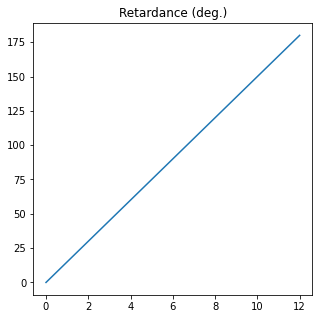

In [42]:
J = Jones_matrix("Diattenuator retarder")
R = np.linspace(0, 180*degrees, 13)
J.diattenuator_retarder_linear(R=R, p1=1, p2=0.5, azimuth=30*degrees)
R = J.parameters.retardance(verbose=True, draw=True)

The field transmissions of Diattenuator are:
The mean value of param Maximum (int.) is 0.7500000000003215 +- 0.14546964399033177
The mean value of param Minimum (int.) is 0.24999999999967848 +- 0.14546964399033177


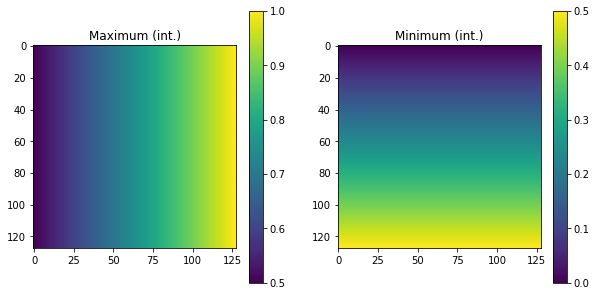

In [43]:
J = Jones_matrix("Diattenuator")
p1 = np.linspace(0.5, 1, 128)
p2 = np.linspace(0, 0.5, 128)
P1, P2 = np.meshgrid(p1, p2)
J.diattenuator_linear(p1=P1, p2=P2, azimuth=30*degrees)
P1, P2 = J.parameters.transmissions(kind='field', draw=True)

There is a function in *Parameters_Jones_Matrix* class, **.get_all()** that computes all the parameters available and stores in a dictionary **.dict_params()**. This function is called when using print upon the *Parameters_Jones_Matrix* class.

Example:

In [51]:
J = Jones_matrix("Diattenuator retarder")
J.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5, azimuth=30*degrees)
print(J,'\n')      
print(J.parameters)

Diattenuator retarder @ 30.00 deg = 
[+0.750 +0.433]   
[+0.433 +0.250]   
 

The matrix components of Diattenuator retarder @ 30.00 deg are:
  J00
(0.7500000000000001+0.12499999999999997j)
  J01
(0.4330127018922193-0.21650635094610965j)
  J10
(0.4330127018922193-0.21650635094610965j)
  J11
(0.24999999999999997+0.37500000000000006j)
Low dimensionality, figure not available.

The diattenuation of Diattenuator retarder @ 30.00 deg is:
[0.6]
Low dimensionality, figure not available.

The retardance of Diattenuator retarder @ 30.00 deg is (deg.):
90.00000000000001
Low dimensionality, figure not available.

The global phase of Diattenuator retarder @ 30.00 deg is (deg.):
9.462322208025613
Low dimensionality, figure not available.

The inhomogeneity parameter of Diattenuator retarder @ 30.00 deg is:
8.881784197001253e-17
Low dimensionality, figure not available.

The intensity transmissions of Diattenuator retarder @ 30.00 deg are:
  Maximum (int.)
1.0000000000000002
  Minimum (int.)
0.24999

## Checks of Jones_matrix

There are several checks that can be performed upon a Jones vector. They are implemented in the independent class *Checks_Jones_matrix*, which is stored in the *checks* field of *Jones_matrix* class.

* **is_phisycall**: Check if the Jones matrices correspond to physically realizable optical elements.
* **is_homogeneous**: Determines if the matrices correspond to homogeneous optical elements.
* **is_retarder**: Checks if the Jones matrices correspond to homogeneous retarders.
* **is_diattenuator / is_polarizer**: Checks if the Jones matrices correspond to homogeneous diattenuators.
* **is_symmetric**: Checks if the Jones matrices are symmetric.
* **is_conjugate_symmetric**: Checks if the Jones matrices are conjugate symmetric.
* **is_eigenstate**: Checks if a given light state is an eigenstate of the objct.



* **get_all**: Returns a dictionary with all the checks of the object.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [45]:
J = Jones_matrix("Diattenuator retarder")
J.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5, azimuth=30*degrees)
cond = J.checks.is_retarder(verbose=True)

Diattenuator retarder @ 30.00 deg is an homogeneous retarder:
False



As with the *Parameters_Jones_matrix* class, 1D and 2D plot draws are also implemented for this class. Also, the *print* function calls to *get_all*:

Diattenuator retarder is an homogeneous diattenuator:
The mean value is 0.1 +- 0.30000000000000004


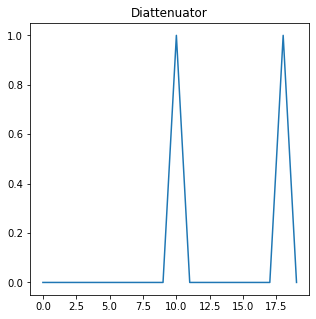

In [46]:
R = np.random.rand(20) * 180*degrees
R[R < 50*degrees] = 0 # In some cases, the diattenuator retarder is reduced to a pure diattenuator

J = Jones_matrix("Diattenuator retarder")
J.diattenuator_retarder_linear(R=R, p1=1, p2=0.5, azimuth=30*degrees)
cond = J.checks.is_diattenuator(draw=True)

## Analysis of Jones_matrix

There are several analysis that can be performed upon a Jones vector. They are implemented in the independent class *Analysis_Jones_matrix*, which is stored in the *analysis* field of *Jones_matrix* class.

* **decompose_pure**: Decomposes the Jones matrices in two: an homogeneous retarder and diattenuator.
* **diattenuator / polarizer**: Analyzes the Jones matrices as if they were diattenuators.
* **retarder**: Analyzes the Jones matrices as if they were retarders.


* **get_all**: Returns a dictionary with all the analysis information of the object.

Note: Some methods are still to be finished.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [48]:
# Create a random diattenuator
p1, p2 = np.random.rand(2)
alpha, delta = np.random.rand(2) * 90*degrees
delta = delta*4
Jd = Jones_matrix("Diattenuator")
Jd.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alpha, delay=delta)
print(Jd)
# Create a random retarder
R, alpha, delta = np.random.rand(3) * 90*degrees
(R, delta) = (R*2, delta*4)
Jr = Jones_matrix("Retarder")
Jr.retarder_charac_angles(R=R, alpha=alpha, delay=delta)
print(Jr)

# Multiply them and try to decompose
J = Jr * Jd
J.name = 'Product'
Jr2, Jd2 = J.analysis.decompose_pure(decomposition='RD')
print(Jd2, Jr2)

Diattenuator = 
[+0.436 +0.022]   
[+0.022 +0.437]   

Retarder = 
[+0.898 -0.439]   
[+0.303 +0.662]   

Product Diattenuator = 
[+0.436 +0.022]   
[+0.022 +0.437]   
 Product Retarder = 
[+0.898 -0.439]   
[+0.303 +0.662]   

